## Harbour.Space ML course

### Seminar 2: extra materials
### Linear Regression Loss functions and Probability interpretation

Based on [Evgeny Sokolov](https://github.com/esokolov) open materials.

## Dataset
Let's analyze the [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile). The data contains categorical, integer, and real-valued features.

In [7]:
import pandas as pd
X_raw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", \
                    header=None, na_values=["?"])

In [8]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [9]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

## Data Preprocessing
Data preprocessing is important for any machine learning method, and especially for linear models. In sklearn, preprocessing can be done using the [preprocessing](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module or pandas library.

In [15]:
from sklearn import impute, preprocessing

### Filling gaps
The design matrix may contain missing values, and this will cause an exception when trying to pass such a matrix to preprocessing or training pipelines. If there are only a few features with missing values, you can remove features with gaps from the training set. However it seems more reasonable to fill the gaps instead and there are different ways to do so:
* fill with averages (mean, median);
* predict missing values ​​from non-missing ones.

The last option is complex and is rarely used. To fill with constant values one can use the `fillna()` dataframe method, to replace with averages - the `impute.SimpleImputer()` class.

In [21]:
# let's have a mask for categorical features for convenience
# such features have "object" datatype
cat_features_mask = (X_raw.dtypes == "object").values 

In [22]:
# для вещественнозначных признаков заполним пропуски средними

X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)
# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

In [23]:
X_no_mis.head()

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


It is always important to be check whether the missing data in a feature is random. Sometimes the fact missing feature information can itself be an important feature that needs to be considered.

__Example:__  user age predicting using smartphone data. Since older people often use simple phones, missing metadata (e.g. the browsing history) is most likely a good feature.

For categorical features it is recommended to create a new category for the missing value. In our data, there are no gaps in categorical features.

### Processing non-numeric features
Almost all machine learning methods require a real-valued matrix as an input of the training process. Training procedure uses real numbers for the convenience of arithmetic operations. Therefore, even if the matrix of feature objects formally contains numeric values, it is always necessary to analyze whether they can be treated as real numbers.

__Example:__ some features can be integer hashes or ids (for example, the id of a social media user), but one cannot add two users and get a third one based on their ids (as a linear model can do).

Consider an example of a categorical feature that takes values ​​from an unordered finite set $K$. To deal with such feature one can use [One-hot encoding](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features). As a result $K$ binary features are created - one for each possible value of the original feature. In sklearn, this can be done using the LabelEncoder + OneHotEncoding classes, but it is easier to use the `pd.get_dummies()` function.

Note that new matrix will have a lot of zero values. To save up RAM, you can set the parameter `OneHotEncoder(sparse = True)` or `.get_dummies(sparse=True)`, and the method will return a [sparse matrix](http://docs.scipy.org/doc/scipy/reference/sparse.html), which stores only non-zero values. Performing matrix operations becomes less efficient, but most sklearn methods can work with sparse matrices.

__Question__: What is the problem with one-hot encoding when using linear regression?


Using one-hot encoding as-is will lead to one redundant one-hot feature (think about it). To avoid redundancy, use `.get_dummies(drop_first=True)`.

In [24]:
X_no_mis.shape

(205, 25)

In [25]:
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
print(X_dum.shape)
X_dum.head()

(205, 66)


,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


String features also require preprocessing. They can be converted into a word frequency matrix [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer), a fixed-length letter combination frequency matrix, and other features can be extracted (e.g. string length).

### Feature scaling
Before training it's often advised to normalize all the features to the same scale. There are several reasons to do so:
* speed-up model convergence (see slides)
* improve numerical stability (floating point numbers are mostly dense near zero, large-scale values are covered worse)
* linear model case: weight value might be interpret as feature importance

The most popular scaling approach - Standardisation or centering: mean value subtractiong with subsequent division by standard deviation. See `StandardScaler()` class from scikit-leark. The second most popular approach - min-max scaler: for each feature subtract min value and divide by difference between max and min feature value.

In [29]:
normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_dum.to_numpy())
X = pd.DataFrame(data=X_real_norm_np)

In [30]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Feature engineering

In some cases it might be useful to add nonlinear feature transformations as additional features. This will allow linear models take into nonlinear dependencies into account when mapping input feature representation to the target variable.

The most popular transformations are: polynomial (`PolynomialFeatures()` in sklearn), logarithmic, sine, cosine and square root.

E.g. the dependence of the target variable on the sixth feature is more quadratic than linear in our dataset:

In [31]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

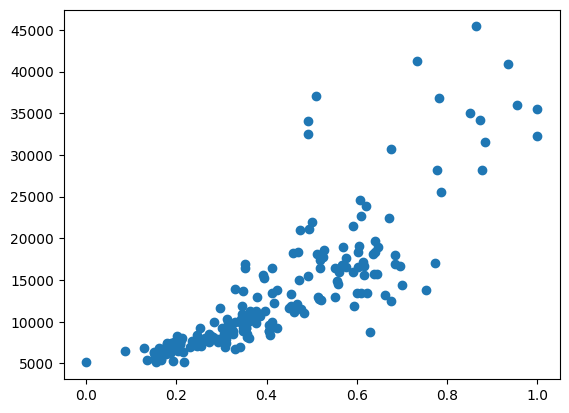

In [32]:
plt.scatter(X[6], y)

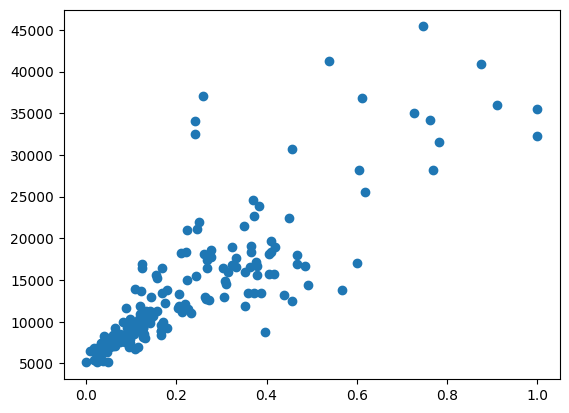

In [33]:
plt.scatter(X[6]**2, y)

Feature #13 can be linearized using inverted square root: $\frac{1}{\sqrt{\cdot}}$

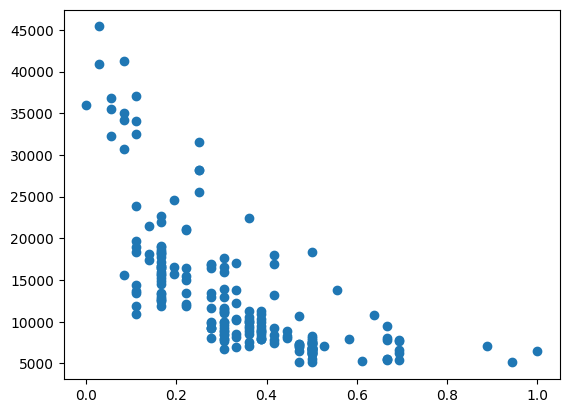

In [34]:
plt.scatter(X[13], y)

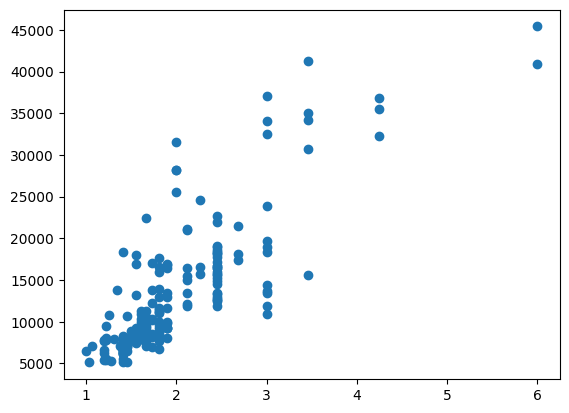

In [35]:
plt.scatter(1/np.sqrt(X[13]), y)

Be careful: adding polynomial features to design matrix may increase RAM consumption dramatically. One should only utilize such feature engineering when trying to model polynomial target-feature dependency using a linear model like simple linear regression.

In [36]:
X.to_json('data_preprocessed.json')

## Loss functions for regression

Error functional for supervised learning problems is defined as a sum over dataset samples:
$$Q(a) = \frac 1 \ell \sum_{i=1}^\ell L(y_i, a(x_i)),$$
where $L(\cdot, \cdot)$ - loss function, a penalty for the difference between predictions and ground truth target values. Loss functions have the following properties:
* $L(y_i, a(x_i)) \geqslant 0$;
* $L(y_i, y_i) = 0$. 

As noted before, the error functional is usually designed to meet the customer's requirements and task specifications. Sometimes researchers can even ignore some of its nice mathematical properties in favor of practical use.

__Example:__ if there's no need to focus on small scale errors (there is no particular difference between 0.01 and 0.1 predictions), but large errors are still critical, one can use the following loss function:

$$
L(y_i, a(x_i)) = [| y_i - a(x_i) | < \varepsilon],
$$
where $\varepsilon$ - acceptable difference between prediction and target.


### Mean Squared and Mean Absolute Error
In addition to business needs, the error function defines some model properties, such as the stability against noisy data.

Mean Squared Error: $L(y_i, a(x_i)) = (a(x_i) - y_i)^2$ does not have this property, because it sets very large penalties for large deviations from the actual value.

Let's see this phenomenon through an example. Let's select one feature which is almost linear to the target (feature index 15 in the X matrix). Let's add two outlier objects to the dataset and see how the regressed predictions change when using MSE as a loss function.

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR

In [38]:
X_subset = X[[7, 15]].values
# let's add two noisy observations
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]])) 

In [39]:
# visualization
def scatter_points_and_plot_line_MSE(X_subset):
    # training points
    plt.scatter(X_subset[:, 0], X_subset[:, 1]) 
    lr = LR()
    lr.fit(X_subset[:, 0][:, np.newaxis], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, np.newaxis])
    # fitted model predictions
    plt.plot(grid, line)

Text(0.5, 0, 'x')

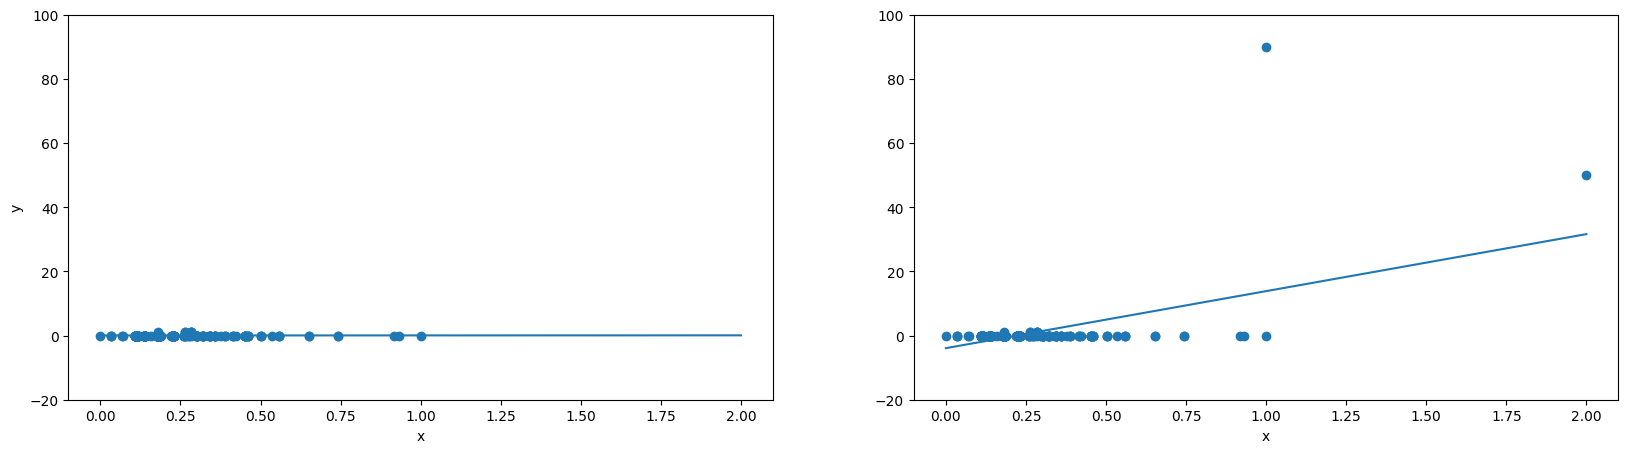

In [40]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

See that noise in data leads to severe change in model parameters. Contrary to MSE function, Mean Absolute Error (MAE) function is stable against noisy observations in data. It is defined as follows: $L(y_i, a(x_i)) = |a(x_i) - y_i|$.

To train regression using MAE, let's sklearn.modelsuseТеперь обучим регрессию, оптимизируя MAE. В sklearn такая регрессия не реализована, но можно использовать модуль statsmodels

In [41]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(loss='epsilon_insensitive')

In [65]:
def scatter_points_and_plot_line_MAE(X_subset):
    lr = SGDRegressor(loss='epsilon_insensitive') # MAE regression is hidden here
    lr.fit(X_subset[:, 0][:, np.newaxis], X_subset[:, 1])

    plt.scatter(X_subset[:, 0], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, np.newaxis])
    # fitted model predictions
    plt.plot(grid, line)

Text(0.5, 0, 'x')

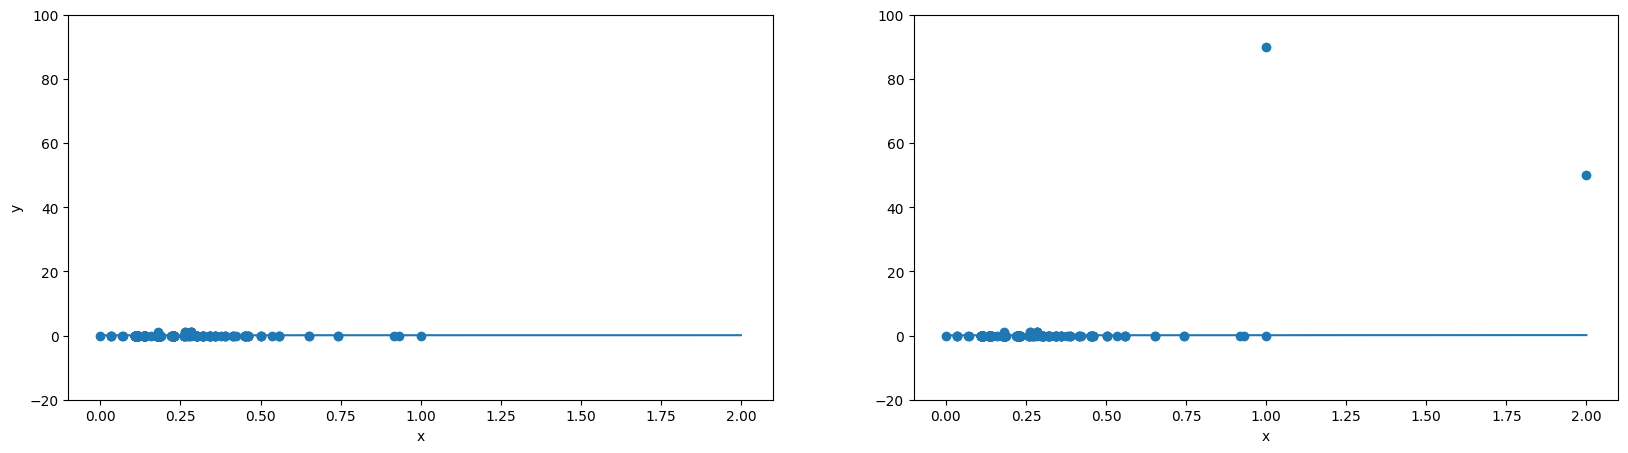

In [67]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MAE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая не изменила направление из-за выбросов.

Попробуем добавить больше шумовых объектов:

In [68]:
n_added_points = 30
X_subset_modified_twice = np.vstack([
    X_subset_modified,
    np.random.randint(5, size=(n_added_points, 2)) * np.array([[1, 30]]) # scale accordingly
])

Text(0.5, 0, 'x')

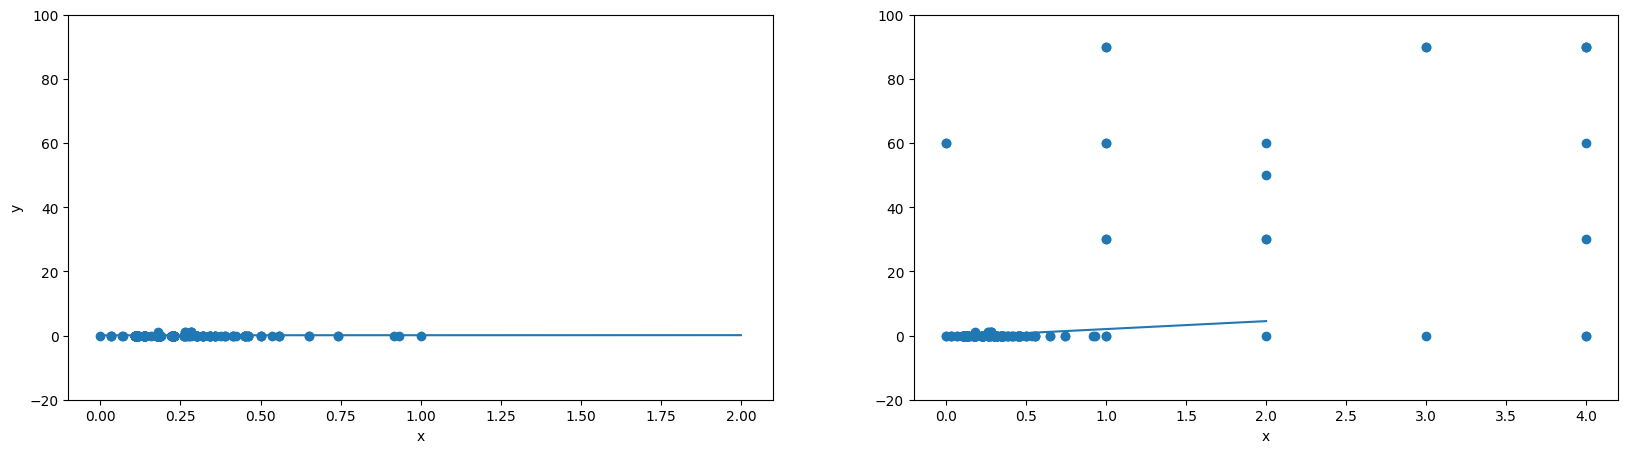

In [70]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MAE(X_subset_modified_twice)
plt.ylim(-20, 100)
plt.xlabel("x")

Model slope only changed when we added 30 noisy observations (almost 15% of the dataset size).

### Huber Loss
Sometimes a "hybrid" of MAE and MSE is used. It is called Huber loss. Like MAE, it is robust to noise objects, and like MSE, it has smaller penalties for small deviations from the actual value of the target:
$$L(y_i, a(x_i)) = \phi_\varepsilon(a(x_i) - y_i)$$
$$\phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}$$

This loss function has continouos first derivative.

In [ ]:
# scikit learn implementation
from sklearn.linear_model import HuberRegressor

### Quantile Loss

In some cases the error penalty depends not only on the magnitude of the target deviation, but also on its sign. For example, it is better to overestimate the demand for some product than underestimate it. Utilizing the first model will cause profit losses. In such cases, quantile regression is used with the following loss function:


$$L(y_i, a(x_i)) = \rho_\tau(y_i - x_i^T w),$$
$$\rho_\tau(z) = \begin{cases} \tau z, \quad z > 0, \\ (\tau - 1) z, \quad z \leqslant 0 \end{cases}$$
$\tau$ paraemeter affects the penalty balance between positive and negative deviation from the target value.

Let's plot all the considered loss functions together in one graph:

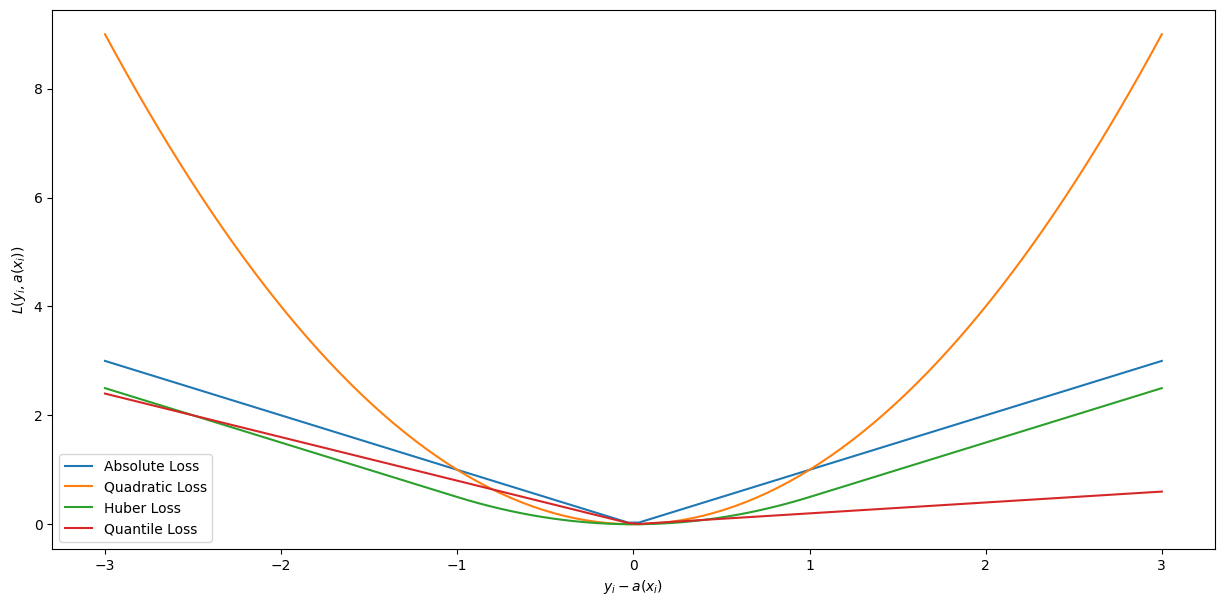

In [73]:
grid = np.linspace(-3, 3, 100)
quantile_tau = 0.2
mse_loss = grid ** 2
mae_loss = np.abs(grid)
huber_loss = 0.5 * mse_loss * (grid >= -1) * (grid <= 1) + (mae_loss - 0.5) * (grid < -1) + (mae_loss - 0.5)  * (grid > 1)
quantile_loss = quantile_tau * grid * (grid > 0) + (quantile_tau - 1) * grid * (grid <= 0)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(grid, mae_loss, label="Absolute Loss")
ax.plot(grid, mse_loss, label="Quadratic Loss")
ax.plot(grid, huber_loss, label="Huber Loss")
ax.plot(grid, quantile_loss, label="Quantile Loss")
ax.set_xlabel("$y_i - a(x_i)$")
ax.set_ylabel("$L(y_i, a(x_i))$")
ax.legend()